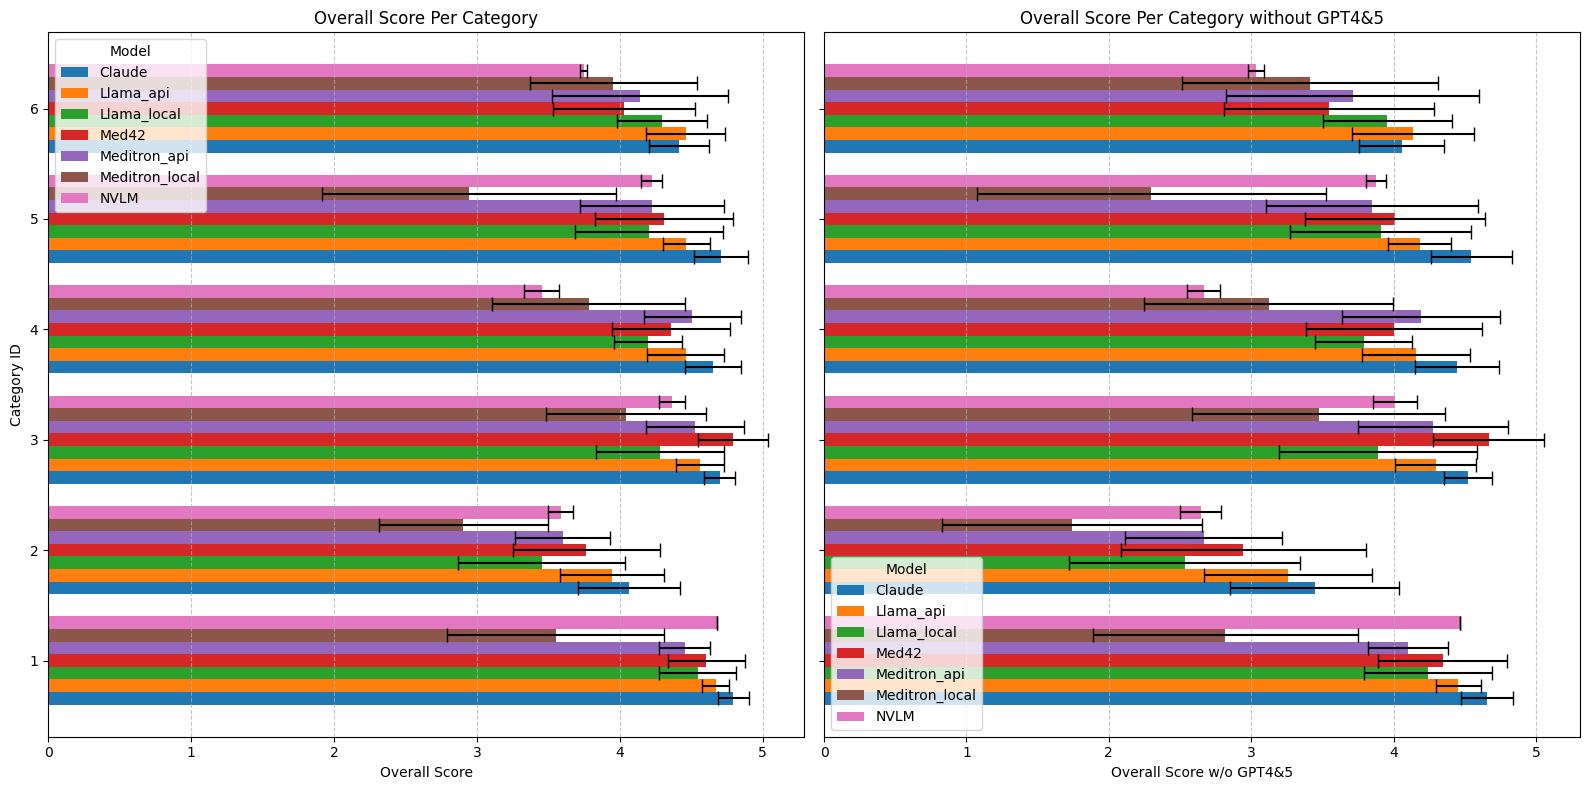

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV file
#df = pd.read_csv('/Users/gonuni/Desktop/College/CBB/HIV_LLMs/deploy_medical_LLM_evaluation/deploy_medical_llm_evaluation/evaluation_results/evaluation_results_merged.csv')
df = pd.read_csv('/cluster/home/gcardenal/HIV/deploy_medical_LLM_evaluation/deploy_medical_llm_evaluation/evaluation_results/evaluation_results_merged_over_iterations.csv')

# Group by 'category_id' and 'model', and calculate the mean and std
grouped = df.groupby(['category_id', 'subfolder']).agg({
    'GPT_overall_score_mean': 'mean',
    'GPT_overall_score_std': 'mean',
    'GPT_overall_score_wo_Q4&5_mean': 'mean',
    'GPT_overall_score_wo_Q4&5_std': 'mean'
}).reset_index()

# Get unique categories and models
categories = grouped['category_id'].unique()
models = grouped['subfolder'].unique()
n_categories = len(categories)
n_models = len(models)

# Calculate bar heights and positions
bar_height = 0.8 / n_models  # Total bar height divided among models
y_positions = np.arange(n_categories)

# Create a figure with two subplots (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Plot 1: Overall scores
for i, model in enumerate(models):
    # Filter data for the current model
    model_data = grouped[grouped['subfolder'] == model]
    # Map category IDs to y positions
    y_offsets = y_positions - 0.4 + i * bar_height + bar_height / 2
    # Get means and standard deviations
    means = model_data['GPT_overall_score_mean']
    stds = model_data['GPT_overall_score_std']
    # Plot horizontal bars
    ax1.barh(y_offsets, means, height=bar_height, xerr=stds, align='center', label=model, capsize=5)

ax1.set_yticks(y_positions)
ax1.set_yticklabels(categories)
ax1.set_xlabel('Overall Score')
ax1.set_ylabel('Category ID')
ax1.set_title('Overall Score Per Category')
ax1.legend(title='Model')
ax1.grid(axis='x', linestyle='--', alpha=0.7)

# Plot 2: Overall scores without Q4&5
for i, model in enumerate(models):
    # Filter data for the current model
    model_data = grouped[grouped['subfolder'] == model]
    # Map category IDs to y positions
    y_offsets = y_positions - 0.4 + i * bar_height + bar_height / 2
    # Get means and standard deviations
    means = model_data['GPT_overall_score_wo_Q4&5_mean']
    stds = model_data['GPT_overall_score_wo_Q4&5_std']
    # Plot horizontal bars
    ax2.barh(y_offsets, means, height=bar_height, xerr=stds, align='center', label=model, capsize=5)

ax2.set_yticks(y_positions)
ax2.set_yticklabels([])  # Remove y-axis labels on the second plot
ax2.set_xlabel('Overall Score w/o GPT4&5')
ax2.set_title('Overall Score Per Category without GPT4&5')
ax2.legend(title='Model')
ax2.grid(axis='x', linestyle='--', alpha=0.7)

# Adjust the layout to avoid overlap
plt.tight_layout()
plt.savefig('gpt-overall_all_models')
plt.show()

In [9]:
df.columns

Index(['model', 'subfolder', 'category_id', 'question_index', 'num_iterations',
       'GPT1_mean', 'GPT2_mean', 'GPT3_mean', 'GPT4_mean', 'GPT5_mean',
       'GPT_overall_score_mean', 'GPT_overall_score_wo_Q4&5_mean', 'GPT1_std',
       'GPT2_std', 'GPT3_std', 'GPT4_std', 'GPT5_std', 'GPT_overall_score_std',
       'GPT_overall_score_wo_Q4&5_std', 'nlp_model', 'precision_mean',
       'precision_std', 'recall_mean', 'recall_std', 'f1_score_mean',
       'f1_score_std', 'synonyms_precision_mean', 'synonyms_precision_std',
       'synonyms_recall_mean', 'synonyms_recall_std', 'synonyms_f1_mean',
       'synonyms_f1_std', 'synonyms_lemmatized_precision_mean',
       'synonyms_lemmatized_precision_std', 'synonyms_lemmatized_recall_mean',
       'synonyms_lemmatized_recall_std', 'synonyms_lemmatized_f1_mean',
       'synonyms_lemmatized_f1_std'],
      dtype='object')

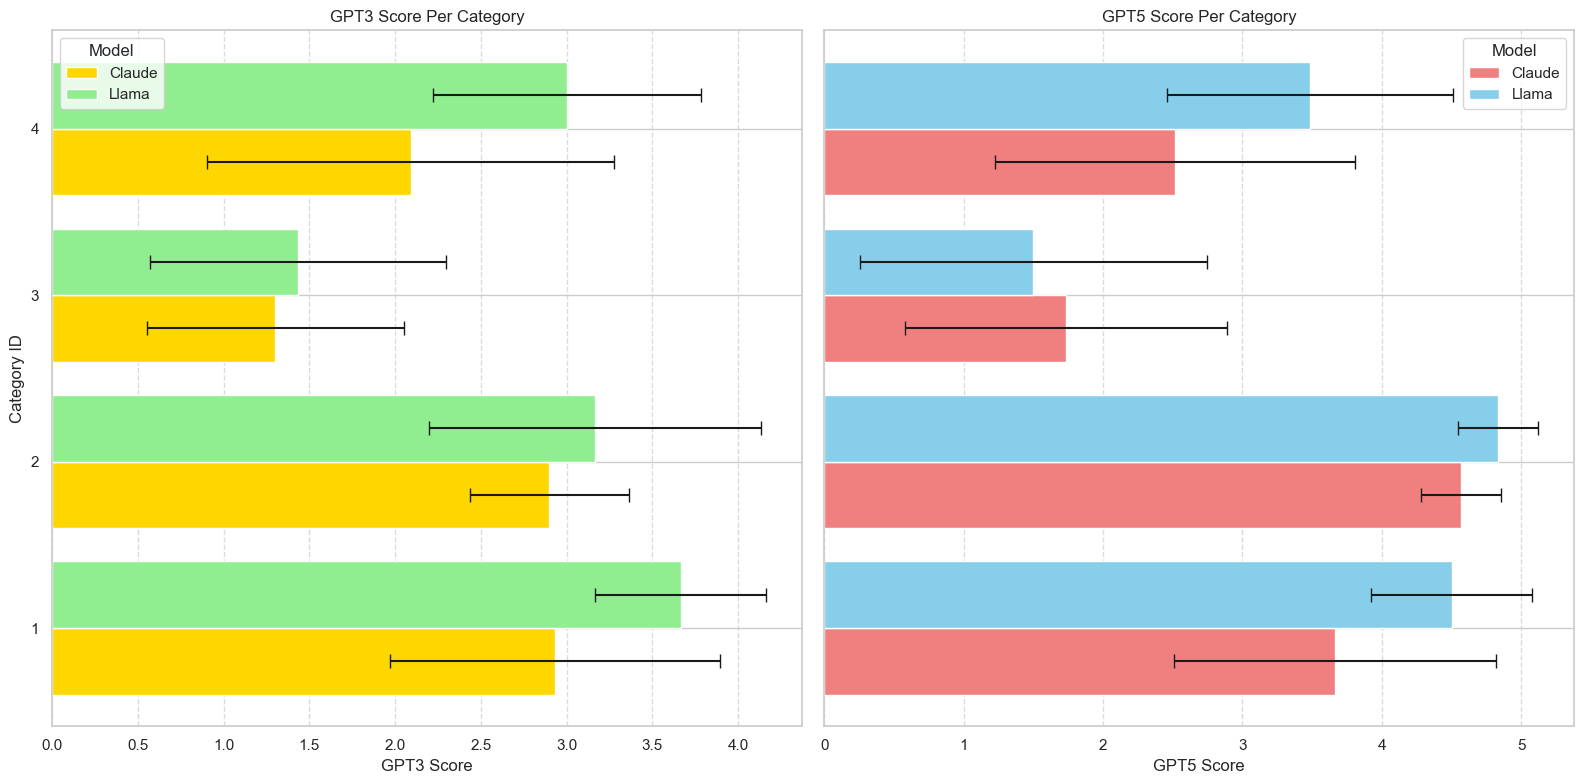

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV file
df = pd.read_csv('/Users/gonuni/Desktop/College/CBB/HIV_LLMs/deploy_medical_LLM_evaluation/'
                 'deploy_medical_llm_evaluation/evaluation_results/evaluation_results_merged.csv')

# Exclude '3_MCQ' category
df = df[df['category_id'] != '3_MCQ']

# Group by 'category_id' and 'model', and calculate the mean and std for Q3 and Q5
grouped = df.groupby(['category_id', 'model']).agg({
    'Q3_mean': 'mean',
    'Q3_std': 'mean',
    'Q5_mean': 'mean',
    'Q5_std': 'mean'
}).reset_index()

# Get unique categories and models
categories = grouped['category_id'].unique()
models = grouped['model'].unique()
n_categories = len(categories)
n_models = len(models)

# Calculate bar heights and positions
bar_height = 0.8 / n_models  # Total bar height divided among models
y_positions = np.arange(n_categories)

# Create a figure with two subplots (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Define specific colors for each model for each plot
# Colors for the first plot (Q3 Scores)
model_colors_q3 = {
    'Llama': 'lightgreen',
    'Claude': 'gold',
    # Add more models and colors if needed
}

# Colors for the second plot (Q5 Scores)
model_colors_q5 = {
    'Llama': 'skyblue',
    'Claude': 'lightcoral',
    # Add more models and colors if needed
}

# Plot 1: Q3 Scores per Category
for i, model in enumerate(models):
    # Filter data for the current model
    model_data = grouped[grouped['model'] == model]
    # Ensure the data is aligned with categories
    model_data = model_data.set_index('category_id').reindex(categories).reset_index()
    # Map category IDs to y positions
    y_offsets = y_positions - 0.4 + i * bar_height + bar_height / 2
    # Get means and standard deviations
    means = model_data['Q3_mean']
    stds = model_data['Q3_std']
    # Get the color for the current model
    color = model_colors_q3.get(model, 'gray')  # Default to 'gray' if model not in dict
    # Plot horizontal bars
    ax1.barh(y_offsets, means, height=bar_height, xerr=stds, align='center',
             color=color, label=model, capsize=5)

ax1.set_yticks(y_positions)
ax1.set_yticklabels(categories)
ax1.set_xlabel('GPT3 Score')
ax1.set_ylabel('Category ID')
ax1.set_title('GPT3 Score Per Category')
ax1.legend(title='Model')
ax1.grid(axis='x', linestyle='--', alpha=0.7)

# Plot 2: Q5 Scores per Category
for i, model in enumerate(models):
    # Filter data for the current model
    model_data = grouped[grouped['model'] == model]
    # Ensure the data is aligned with categories
    model_data = model_data.set_index('category_id').reindex(categories).reset_index()
    # Map category IDs to y positions
    y_offsets = y_positions - 0.4 + i * bar_height + bar_height / 2
    # Get means and standard deviations
    means = model_data['Q5_mean']
    stds = model_data['Q5_std']
    # Get the color for the current model
    color = model_colors_q5.get(model, 'gray')  # Default to 'gray' if model not in dict
    # Plot horizontal bars
    ax2.barh(y_offsets, means, height=bar_height, xerr=stds, align='center',
             color=color, label=model, capsize=5)

ax2.set_yticks(y_positions)
ax2.set_yticklabels([])
ax2.set_xlabel('GPT5 Score')
ax2.set_title('GPT5 Score Per Category')
ax2.legend(title='Model')
ax2.grid(axis='x', linestyle='--', alpha=0.7)

# Adjust the layout to avoid overlap
plt.tight_layout()
plt.show()

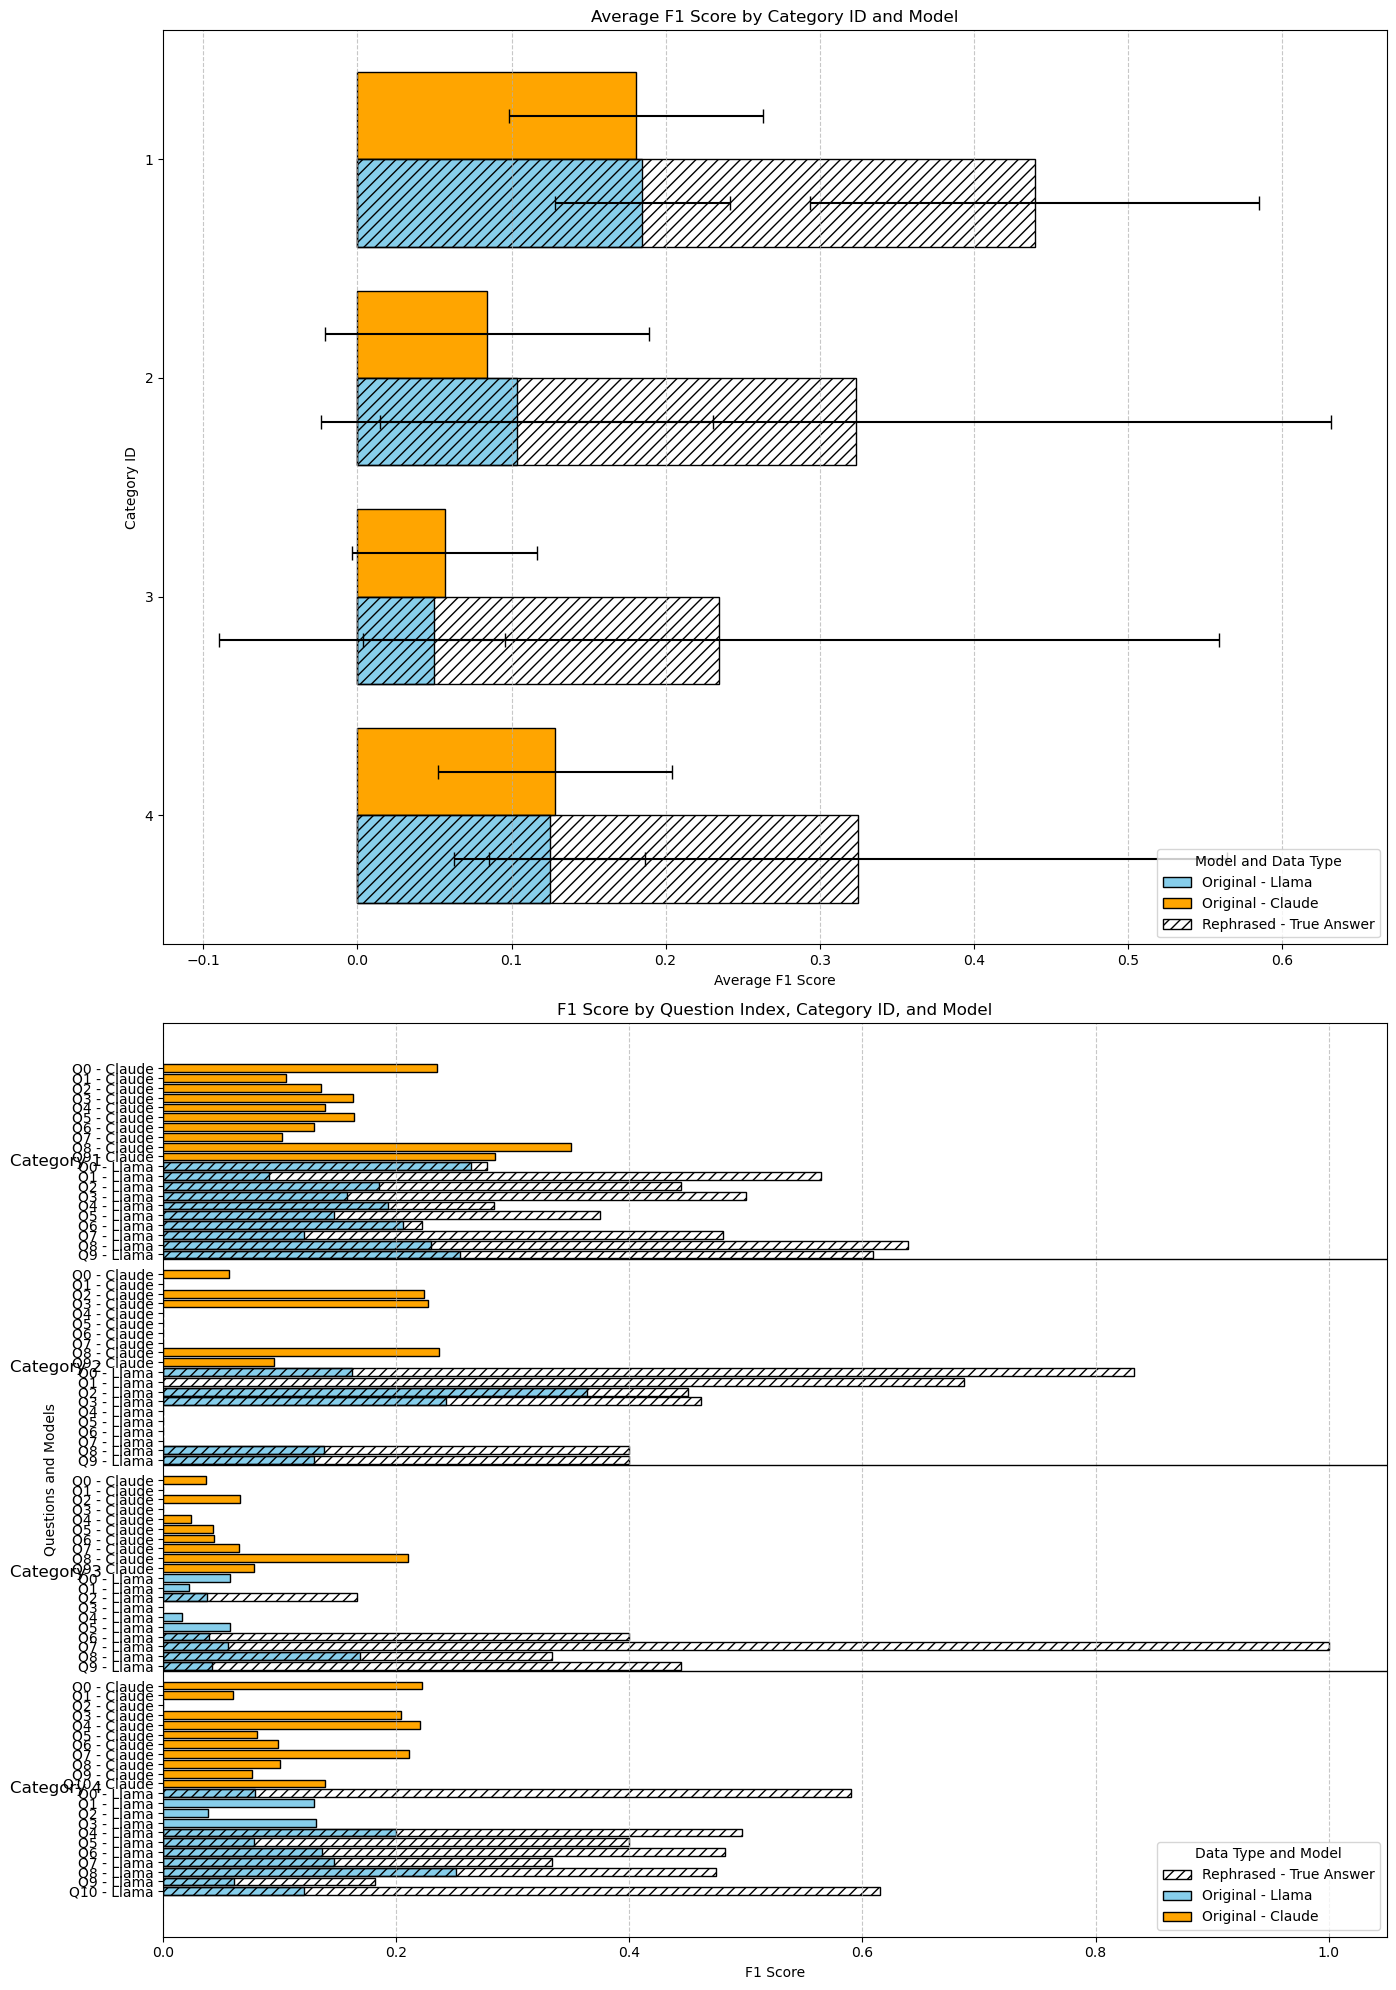

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

# Load the data
df = pd.read_csv('../deploy_medical_llm_evaluation/evaluation_results/evaluation_results_merged.csv')
df_rephrased = pd.read_csv('/Users/gonuni/Desktop/College/CBB/HIV_LLMs/Medical_LLM_Evaluation/evaluation_results/evaluation_results_rephrased_check_merged-Copy1.csv')
# Exclude rows where 'category_id' is '3_MCQ'
df = df[df['category_id'] != '3_MCQ']
df_rephrased = df_rephrased[df_rephrased['category_id'] != '3_MCQ']

# Prepare data for the first subplot
grouped_df = df.groupby(['category_id', 'model'])['f1_score_mean'].agg(['mean', 'std']).reset_index()
grouped_df_rephrased = df_rephrased.groupby(['category_id', 'model'])['f1_score_mean'].agg(['mean', 'std']).reset_index()

# Merge grouped dataframes on 'category_id' and 'model' using outer join
grouped_merged = pd.merge(
    grouped_df,
    grouped_df_rephrased,
    on=['category_id', 'model'],
    suffixes=('_original', '_rephrased'),
    how='outer'
)

# Fill NaN values with zeros
grouped_merged.fillna(0, inplace=True)

# Initialize colors for models
models_colors = {
    'Llama': 'skyblue',
    'Claude': 'orange',
 #   'ModelX': 'green',  # Add other models and colors as needed
    # 'Claude': 'red',
    # etc.
}

# Get unique categories and models
categories = grouped_merged['category_id'].unique()
models = grouped_merged['model'].unique()
n_models = len(models)
bar_height = 0.8 / n_models
index = np.arange(len(categories))
offset = -0.4 + bar_height / 2

# Set up the figure and axes
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 20))
plt.subplots_adjust(hspace=0.5)

# First subplot: Average F1 Score by Category ID and Model
for i, model in enumerate(models):
    # Filter data for the current model
    model_data = grouped_merged[grouped_merged['model'] == model]
    # Ensure data aligns with categories
    model_data = model_data.set_index('category_id').reindex(categories).reset_index()
    # Positions for the bars
    positions = index + offset + i * bar_height
    # Get values
    mean_original = model_data['mean_original']
    std_original = model_data['std_original']
    mean_rephrased = model_data['mean_rephrased']
    std_rephrased = model_data['std_rephrased']

    # Plot original data
    axes[0].barh(
        y=positions,
        width=mean_original,
        xerr=std_original,
        height=bar_height,
        align='center',
        color=models_colors.get(model, 'gray'),
        edgecolor='black',
        capsize=5
    )
    # Plot rephrased data as a hatch over the original bar
    if not mean_rephrased.isnull().all() and not (mean_rephrased == 0).all():
        axes[0].barh(
            y=positions,
            width=mean_rephrased,
            xerr=std_rephrased,
            height=bar_height,
            align='center',
            facecolor='none',
            edgecolor='black',
            hatch='///',
            capsize=5
        )

# Set y-ticks and labels
axes[0].set_yticks(index)
axes[0].set_yticklabels(categories)
axes[0].set_xlabel('Average F1 Score')
axes[0].set_ylabel('Category ID')
axes[0].set_title('Average F1 Score by Category ID and Model')
axes[0].invert_yaxis()
axes[0].grid(axis='x', linestyle='--', alpha=0.7)

# Create custom legend
legend_elements = [
    Patch(facecolor=color, edgecolor='black', label=f'Original - {model}') for model, color in models_colors.items()
]
legend_elements.append(
    Patch(facecolor='white', edgecolor='black', hatch='///', label='Rephrased - True Answer')
)
axes[0].legend(handles=legend_elements, title='Model and Data Type', loc='lower right')

# Prepare data for the second subplot
df_sorted = df.sort_values(by=['category_id', 'question_index', 'model']).reset_index(drop=True)
df_rephrased_sorted = df_rephrased.sort_values(by=['category_id', 'question_index', 'model']).reset_index(drop=True)

# Merge df_sorted and df_rephrased_sorted using outer join
merged_df = pd.merge(
    df_sorted[['category_id', 'question_index', 'model', 'f1_score_mean']],
    df_rephrased_sorted[['category_id', 'question_index', 'model', 'f1_score_mean']],
    on=['category_id', 'question_index', 'model'],
    suffixes=('_original', '_rephrased'),
    how='outer'
)

merged_df.fillna(0, inplace=True)

# Initialize variables for the second subplot
y_positions = []
y_labels = []
f1_scores_original = []
f1_scores_rephrased = []
colors_list = []
category_separators = []
category_labels_positions = []
category_labels = []

y_pos = 0
category_gap = 1

for i, category in enumerate(categories):
    category_data = merged_df[merged_df['category_id'] == category]
    models_in_category = category_data['model'].unique()

    # Store position for category label
    category_labels_positions.append(y_pos + (len(category_data) - 1) / 2)
    category_labels.append(f"Category {category}")

    for model in models_in_category:
        model_data = category_data[category_data['model'] == model].reset_index(drop=True)
        num_questions = len(model_data)

        for idx in range(num_questions):
            y_positions.append(y_pos)
            question_index = model_data.iloc[idx]['question_index']
            y_labels.append(f"Q{int(question_index)} - {model}")
            f1_scores_original.append(model_data.iloc[idx]['f1_score_mean_original'])
            f1_scores_rephrased.append(model_data.iloc[idx]['f1_score_mean_rephrased'])
            colors_list.append(models_colors.get(model, 'gray'))
            y_pos += 1

    if i < len(categories) - 1:
        category_separators.append(y_pos - 0.5)
        y_pos += category_gap

# Second subplot: F1 Score by Question Index, Category ID, and Model
axes[1].barh(
    y=y_positions,
    width=f1_scores_original,
    height=0.8,
    color=colors_list,
    edgecolor='black'
)

# Overlay rephrased data as hatches over the original bars
for idx in range(len(y_positions)):
    if f1_scores_rephrased[idx] != 0:
        axes[1].barh(
            y=y_positions[idx],
            width=f1_scores_rephrased[idx],
            height=0.8,
            facecolor='none',
            edgecolor='black',
            hatch='///'
        )

# Set y-axis ticks and labels
axes[1].set_yticks(y_positions)
axes[1].set_yticklabels(y_labels)

# Add category separators
for sep in category_separators:
    axes[1].axhline(y=sep, color='black', linewidth=1)

# Add category labels on the left side
for pos, label in zip(category_labels_positions, category_labels):
    axes[1].text(
        x=-0.05,
        y=pos,
        s=label,
        va='center',
        ha='right',
        fontsize=12,
        transform=axes[1].get_yaxis_transform()
    )

axes[1].set_xlabel('F1 Score')
axes[1].set_ylabel('Questions and Models')
axes[1].set_title('F1 Score by Question Index, Category ID, and Model')
axes[1].invert_yaxis()
axes[1].grid(axis='x', linestyle='--', alpha=0.7)

# Create custom legend
legend_elements = [
    Patch(facecolor='white', edgecolor='black', hatch='///', label='Rephrased - True Answer')
] + [
    Patch(facecolor=color, edgecolor='black', label=f'Original - {model}') for model, color in models_colors.items()
]
axes[1].legend(handles=legend_elements, title='Data Type and Model', loc='lower right')

# Adjust layout and show plot
plt.tight_layout()
plt.savefig('f1_scores.jpg')
plt.show()

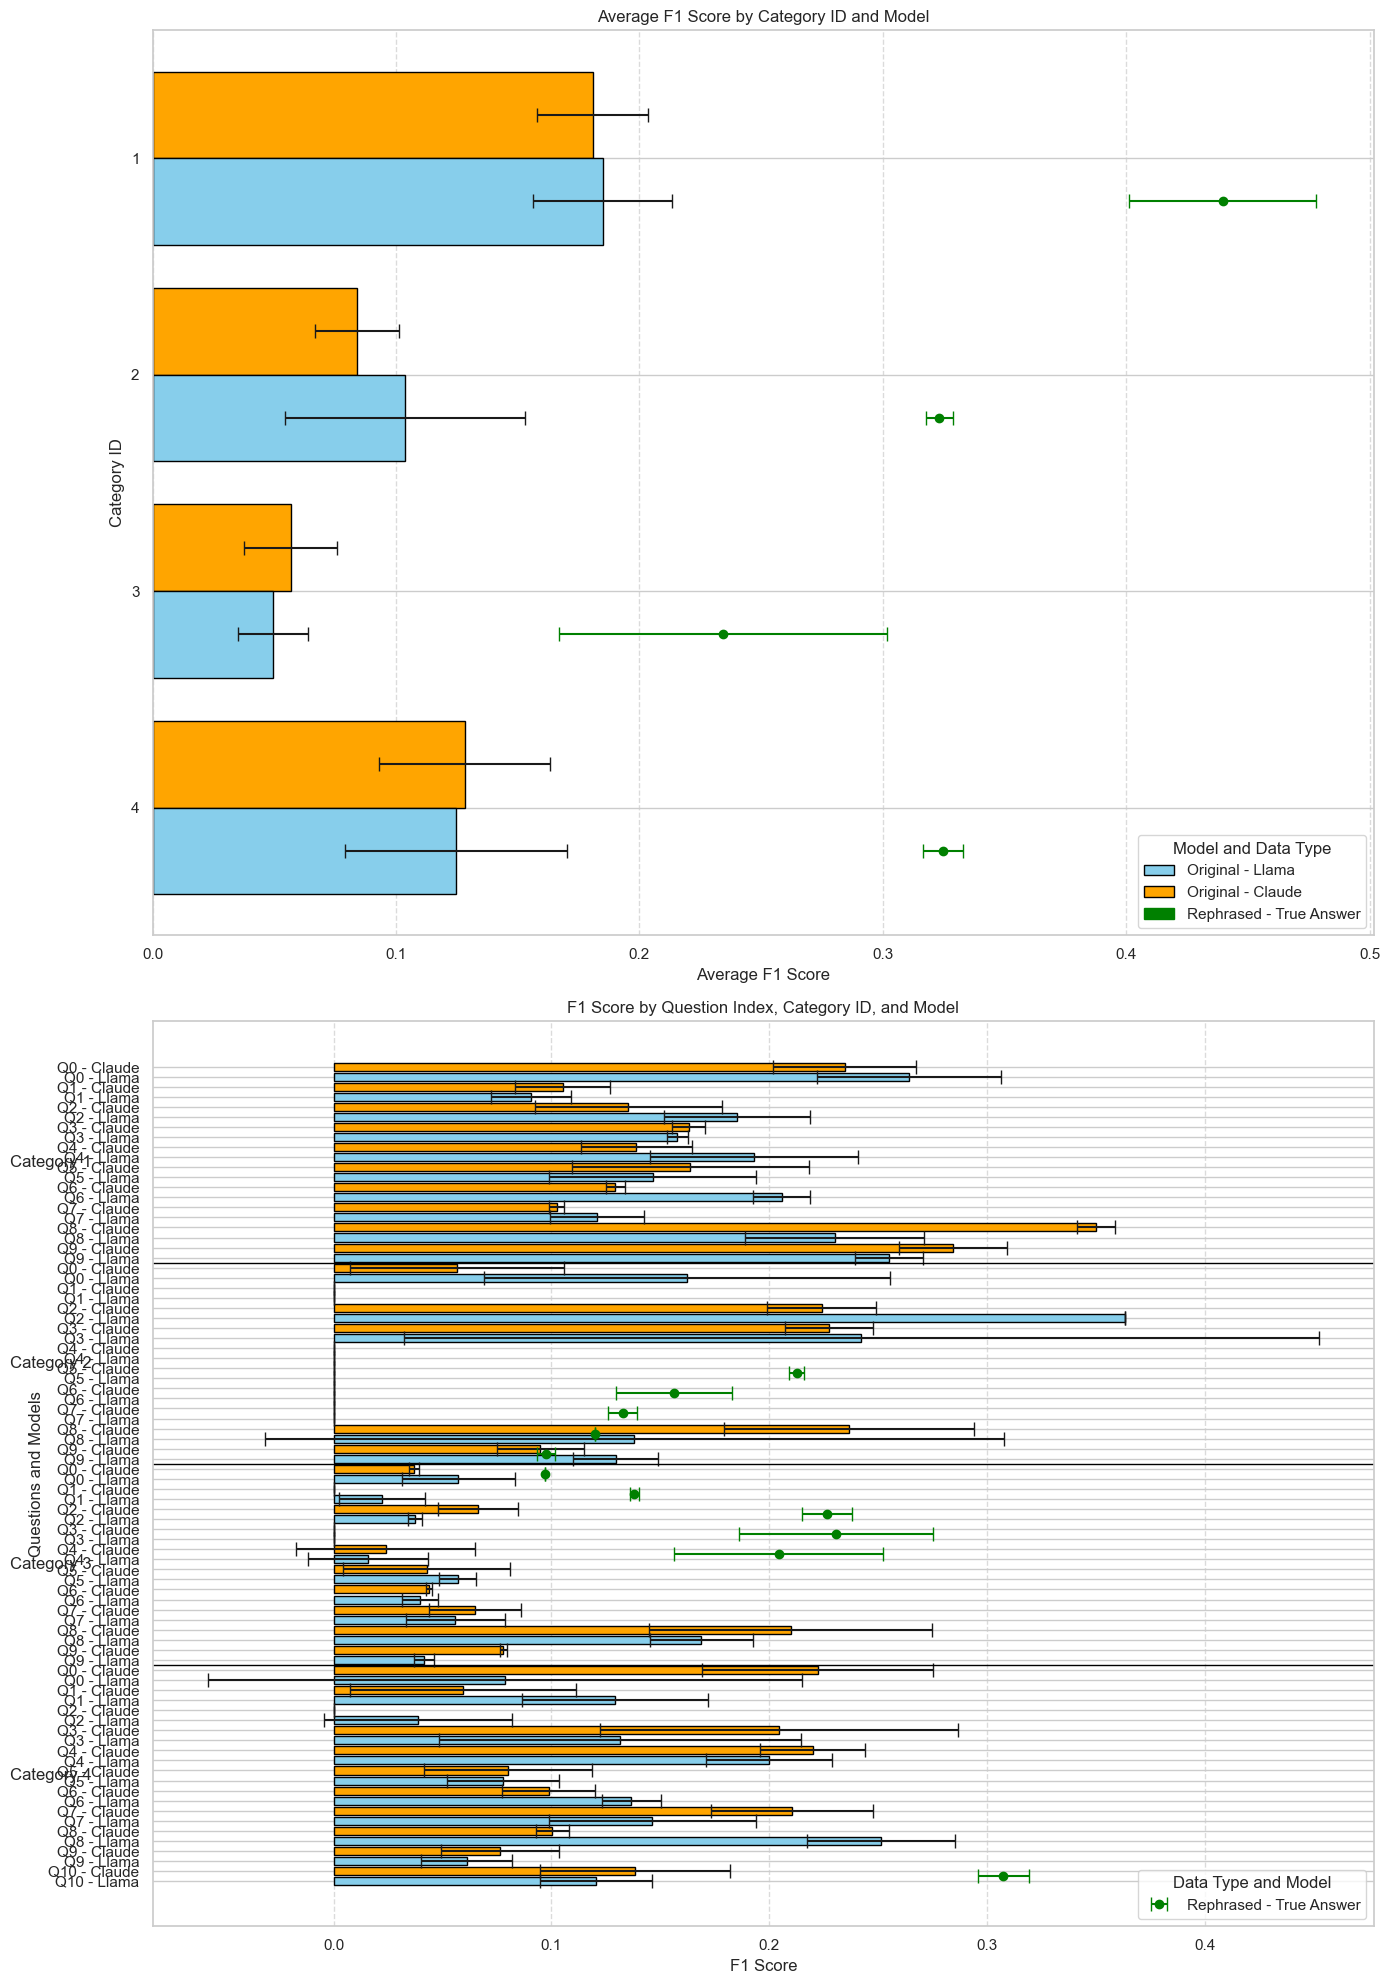

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch
from collections import OrderedDict

# Load the data
df = pd.read_csv('../deploy_medical_llm_evaluation/evaluation_results/evaluation_results_merged.csv')
df_rephrased = pd.read_csv('/Users/gonuni/Desktop/College/CBB/HIV_LLMs/Medical_LLM_Evaluation/evaluation_results/evaluation_results_rephrased_check_merged-Copy1.csv')

# Exclude rows where 'category_id' is '3_MCQ'
df = df[df['category_id'] != '3_MCQ']
df_rephrased = df_rephrased[df_rephrased['category_id'] != '3_MCQ']

# Prepare data for the first subplot
grouped_df = df.groupby(['category_id', 'model']).agg({
    'f1_score_mean': 'mean',
    'f1_score_std': 'mean'
}).reset_index()
grouped_df_rephrased = df_rephrased.groupby(['category_id', 'model']).agg({
    'f1_score_mean': 'mean',
    'f1_score_std': 'mean'
}).reset_index()

# Merge grouped dataframes on 'category_id' and 'model' using outer join
grouped_merged = pd.merge(
    grouped_df,
    grouped_df_rephrased,
    on=['category_id', 'model'],
    suffixes=('_original', '_rephrased'),
    how='outer'
)

# Fill NaN values with zeros
grouped_merged.fillna(0, inplace=True)

# Initialize colors for models
models_colors = {
    'Llama': 'skyblue',
    'Claude': 'orange',
    # Add other models and colors as needed
}

# Get unique categories and models
categories = grouped_merged['category_id'].unique()
models = grouped_merged['model'].unique()
n_models = len(models)
bar_height = 0.8 / n_models
index = np.arange(len(categories))
offset = -0.4 + bar_height / 2

# Set up the figure and axes
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 20))
plt.subplots_adjust(hspace=0.5)

### First Subplot: Average F1 Score by Category ID and Model ###
for i, model in enumerate(models):
    # Filter data for the current model
    model_data = grouped_merged[grouped_merged['model'] == model]
    # Ensure data aligns with categories
    model_data = model_data.set_index('category_id').reindex(categories).reset_index()
    # Positions for the bars
    positions = index + offset + i * bar_height
    # Get values
    mean_original = model_data['f1_score_mean_original']
    std_original = model_data['f1_score_std_original']
    mean_rephrased = model_data['f1_score_mean_rephrased']
    std_rephrased = model_data['f1_score_std_rephrased']

    # Plot original data with error bars
    axes[0].barh(
        y=positions,
        width=mean_original,
        xerr=std_original,
        height=bar_height,
        align='center',
        color=models_colors.get(model, 'gray'),
        edgecolor='black',
        capsize=5
    )

    # Plot rephrased data as green lines with error bars
    for idx, pos in enumerate(positions):
        if mean_rephrased[idx] != 0:
            axes[0].errorbar(
                x=mean_rephrased[idx],
                y=pos,
                xerr=std_rephrased[idx],
                fmt='o',
                color='green',
                ecolor='green',
                capsize=5,
                label='Rephrased - True Answer' if i == 0 and idx == 0 else ""
            )

# Set y-ticks and labels
axes[0].set_yticks(index)
axes[0].set_yticklabels(categories)
axes[0].set_xlabel('Average F1 Score')
axes[0].set_ylabel('Category ID')
axes[0].set_title('Average F1 Score by Category ID and Model')
axes[0].invert_yaxis()
axes[0].grid(axis='x', linestyle='--', alpha=0.7)

# Create custom legend
legend_elements = [
    Patch(facecolor=color, edgecolor='black', label=f'Original - {model}') for model, color in models_colors.items()
]
legend_elements.append(
    Patch(facecolor='green', edgecolor='green', label='Rephrased - True Answer')
)
axes[0].legend(handles=legend_elements, title='Model and Data Type', loc='lower right')

### Second Subplot: F1 Score by Question Index, Category ID, and Model ###
# Prepare data for the second subplot
df_sorted = df.sort_values(by=['category_id', 'question_index', 'model']).reset_index(drop=True)
df_rephrased_sorted = df_rephrased.sort_values(by=['category_id', 'question_index', 'model']).reset_index(drop=True)

# Merge df_sorted and df_rephrased_sorted using outer join
merged_df = pd.merge(
    df_sorted[['category_id', 'question_index', 'model', 'f1_score_mean', 'f1_score_std']],
    df_rephrased_sorted[['category_id', 'question_index', 'model', 'f1_score_mean', 'f1_score_std']],
    on=['category_id', 'question_index', 'model'],
    suffixes=('_original', '_rephrased'),
    how='outer'
)

merged_df.fillna(0, inplace=True)

# Sort merged_df
merged_df.sort_values(by=['category_id', 'question_index', 'model'], inplace=True)
merged_df.reset_index(drop=True, inplace=True)

# Create y_positions
merged_df['y_position'] = merged_df.index

# Create y_labels
merged_df['y_label'] = merged_df.apply(
    lambda row: f"Q{int(row['question_index'])} - {row['model']}", axis=1
)

# Get colors for models
merged_df['color'] = merged_df['model'].apply(lambda model: models_colors.get(model, 'gray'))

# Collect data
y_positions = merged_df['y_position']
y_labels = merged_df['y_label']
f1_scores_original = merged_df['f1_score_mean_original']
std_original = merged_df['f1_score_std_original']
f1_scores_rephrased = merged_df['f1_score_mean_rephrased']
std_rephrased = merged_df['f1_score_std_rephrased']
colors_list = merged_df['color']

# Plot model F1 scores with error bars
axes[1].barh(
    y=y_positions,
    width=f1_scores_original,
    xerr=std_original,
    height=0.8,
    color=colors_list,
    edgecolor='black',
    capsize=5,
    align='center'
)

# Plot rephrased data as green lines with error bars
question_indices = merged_df['question_index'].unique()
for question_index in question_indices:
    question_data = merged_df[merged_df['question_index'] == question_index]
    y_positions_question = question_data['y_position'].values
    if len(y_positions_question) > 0:
        # Compute middle y_position
        y_middle = y_positions_question.mean()
        # Get rephrased F1 score and std
        f1_rephrased = question_data['f1_score_mean_rephrased'].mean()
        std_rephrased = question_data['f1_score_std_rephrased'].mean()
        # Only plot if rephrased data is available
        if f1_rephrased != 0:
            axes[1].errorbar(
                x=f1_rephrased,
                y=y_middle,
                xerr=std_rephrased,
                fmt='o',
                color='green',
                ecolor='green',
                capsize=5,
                label='Rephrased - True Answer' if question_index == question_indices[0] else ""
            )

# Remove duplicate labels in legend
handles, labels = axes[1].get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
axes[1].legend(by_label.values(), by_label.keys(), title='Data Type and Model', loc='lower right')

# Set y-axis ticks and labels
axes[1].set_yticks(y_positions)
axes[1].set_yticklabels(y_labels)

# Add category separators
category_changes = merged_df['category_id'].ne(merged_df['category_id'].shift())
separator_positions = merged_df[category_changes].index.values - 0.5
for sep in separator_positions[1:]:
    axes[1].axhline(y=sep, color='black', linewidth=1)

# Add category labels
category_positions = merged_df.groupby('category_id')['y_position'].mean()
for category_id, y_pos in category_positions.items():
    axes[1].text(
        x=-0.05,
        y=y_pos,
        s=f"Category {category_id}",
        va='center',
        ha='right',
        fontsize=12,
        transform=axes[1].get_yaxis_transform()
    )

axes[1].set_xlabel('F1 Score')
axes[1].set_ylabel('Questions and Models')
axes[1].set_title('F1 Score by Question Index, Category ID, and Model')
axes[1].invert_yaxis()
axes[1].grid(axis='x', linestyle='--', alpha=0.7)

# Adjust layout and show plot
plt.tight_layout()
plt.savefig('f1_scores.jpg')
plt.show()

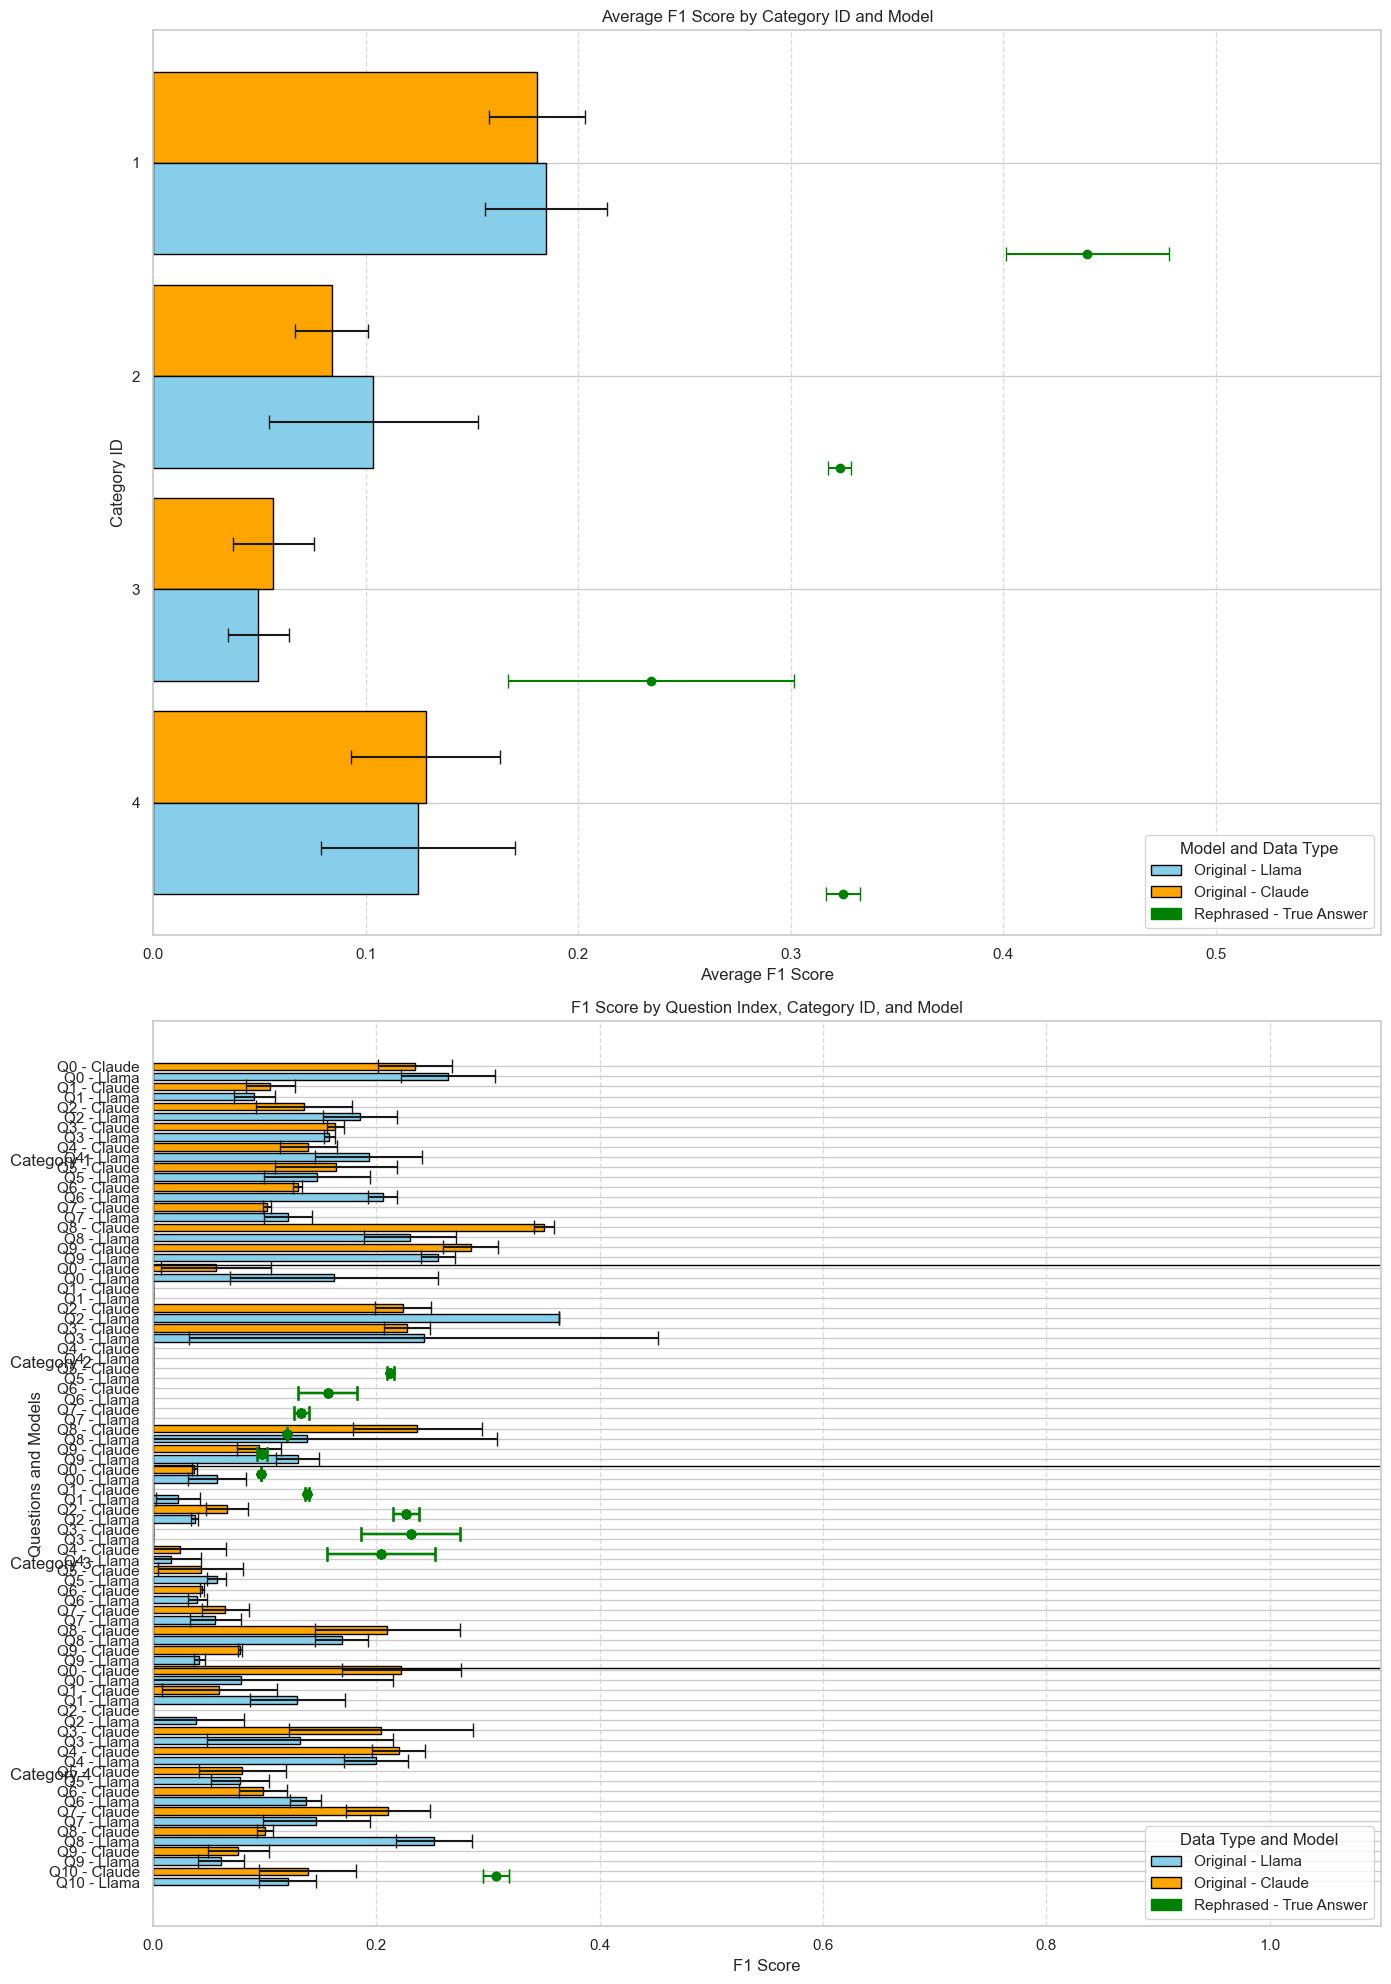

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch
from collections import OrderedDict

# Load the data
df = pd.read_csv('../deploy_medical_llm_evaluation/evaluation_results/evaluation_results_merged.csv')
df_rephrased = pd.read_csv('/Users/gonuni/Desktop/College/CBB/HIV_LLMs/Medical_LLM_Evaluation/evaluation_results/evaluation_results_rephrased_check_merged-Copy1.csv')

# Exclude rows where 'category_id' is '3_MCQ'
df = df[df['category_id'] != '3_MCQ']
df_rephrased = df_rephrased[df_rephrased['category_id'] != '3_MCQ']

# Prepare data for the first subplot
grouped_df = df.groupby(['category_id', 'model']).agg({
    'f1_score_mean': 'mean',
    'f1_score_std': 'mean'
}).reset_index()
grouped_df_rephrased = df_rephrased.groupby(['category_id', 'model']).agg({
    'f1_score_mean': 'mean',
    'f1_score_std': 'mean'
}).reset_index()

# Merge grouped dataframes on 'category_id' and 'model' using outer join
grouped_merged = pd.merge(
    grouped_df,
    grouped_df_rephrased,
    on=['category_id', 'model'],
    suffixes=('_original', '_rephrased'),
    how='outer'
)

# Fill NaN values with zeros
grouped_merged.fillna(0, inplace=True)

# Initialize colors for models
models_colors = {
    'Llama': 'skyblue',
    'Claude': 'orange',
    # Add other models and colors as needed
}

# Get unique categories and models
categories = grouped_merged['category_id'].unique()
models = grouped_merged['model'].unique()
n_models = len(models)
bar_height = 0.6  # Increased bar height for thicker bars
index = np.arange(len(categories))
bar_spacing = 0.2  # Added spacing between groups

# Adjust index to include spacing
index = index * (bar_height * n_models + bar_spacing)

# Set up the figure and axes
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 20))
plt.subplots_adjust(hspace=0.5)

### First Subplot: Average F1 Score by Category ID and Model ###
for i, model in enumerate(models):
    # Filter data for the current model
    model_data = grouped_merged[grouped_merged['model'] == model]
    # Ensure data aligns with categories
    model_data = model_data.set_index('category_id').reindex(categories).reset_index()
    # Positions for the bars
    positions = index + i * bar_height
    # Get values
    mean_original = model_data['f1_score_mean_original']
    std_original = model_data['f1_score_std_original']
    mean_rephrased = model_data['f1_score_mean_rephrased']
    std_rephrased = model_data['f1_score_std_rephrased']

    # Plot original data with error bars
    axes[0].barh(
        y=positions,
        width=mean_original,
        xerr=std_original,
        height=bar_height,
        align='center',
        color=models_colors.get(model, 'gray'),
        edgecolor='black',
        capsize=5,
        label=f'Original - {model}' if i == 0 else ""
    )

    # Plot rephrased data as green lines with error bars
    for idx, pos in enumerate(positions):
        if mean_rephrased[idx] != 0:
            axes[0].errorbar(
                x=mean_rephrased[idx],
                y=pos + bar_height / 2,  # Position between bars
                xerr=std_rephrased[idx],
                fmt='o',
                color='green',
                ecolor='green',
                capsize=5,
                label='Rephrased - True Answer' if i == 0 and idx == 0 else ""
            )

# Set y-ticks and labels
axes[0].set_yticks(index + bar_height * (n_models - 1) / 2)
axes[0].set_yticklabels(categories)
axes[0].set_xlabel('Average F1 Score')
axes[0].set_ylabel('Category ID')
axes[0].set_title('Average F1 Score by Category ID and Model')
axes[0].invert_yaxis()
axes[0].grid(axis='x', linestyle='--', alpha=0.7)

# Adjust x-axis limit to include highest rephrased F1 score plus its standard deviation
max_rephrased = grouped_merged['f1_score_mean_rephrased'].max()
std_rephrased_max = grouped_merged.loc[grouped_merged['f1_score_mean_rephrased'] == max_rephrased, 'f1_score_std_rephrased'].values[0]
axes[0].set_xlim([0, max_rephrased + std_rephrased_max + 0.1])  # Add extra margin if needed

# Create custom legend
legend_elements = [
    Patch(facecolor=color, edgecolor='black', label=f'Original - {model}') for model, color in models_colors.items()
]
legend_elements.append(
    Patch(facecolor='green', edgecolor='green', label='Rephrased - True Answer')
)
axes[0].legend(handles=legend_elements, title='Model and Data Type', loc='lower right')

### Second Subplot: F1 Score by Question Index, Category ID, and Model ###
# Prepare data for the second subplot
df_sorted = df.sort_values(by=['category_id', 'question_index', 'model']).reset_index(drop=True)
df_rephrased_sorted = df_rephrased.sort_values(by=['category_id', 'question_index', 'model']).reset_index(drop=True)

# Merge df_sorted and df_rephrased_sorted using outer join
merged_df = pd.merge(
    df_sorted[['category_id', 'question_index', 'model', 'f1_score_mean', 'f1_score_std']],
    df_rephrased_sorted[['category_id', 'question_index', 'model', 'f1_score_mean', 'f1_score_std']],
    on=['category_id', 'question_index', 'model'],
    suffixes=('_original', '_rephrased'),
    how='outer'
)

merged_df.fillna(0, inplace=True)

# Sort merged_df
merged_df.sort_values(by=['category_id', 'question_index', 'model'], inplace=True)
merged_df.reset_index(drop=True, inplace=True)

# Create y_positions with increased separation
bar_height_2 = 0.6  # Increased bar height
bar_spacing_2 = 0.2  # Spacing between groups
merged_df['y_position'] = np.arange(len(merged_df)) * (bar_height_2 + bar_spacing_2)

# Create y_labels
merged_df['y_label'] = merged_df.apply(
    lambda row: f"Q{int(row['question_index'])} - {row['model']}", axis=1
)

# Get colors for models
merged_df['color'] = merged_df['model'].apply(lambda model: models_colors.get(model, 'gray'))

# Collect data
y_positions = merged_df['y_position']
y_labels = merged_df['y_label']
f1_scores_original = merged_df['f1_score_mean_original']
std_original = merged_df['f1_score_std_original']
f1_scores_rephrased = merged_df['f1_score_mean_rephrased']
std_rephrased = merged_df['f1_score_std_rephrased']
colors_list = merged_df['color']

# Plot model F1 scores with error bars
axes[1].barh(
    y=y_positions,
    width=f1_scores_original,
    xerr=std_original,
    height=bar_height_2,
    color=colors_list,
    edgecolor='black',
    capsize=5,
    align='center',
    label='_nolegend_'  # Exclude from legend
)

# Plot rephrased data as green lines with error bars
questions = merged_df[['question_index', 'y_position']].drop_duplicates()
for idx, row in questions.iterrows():
    question_index = row['question_index']
    y_positions_question = merged_df[merged_df['question_index'] == question_index]['y_position'].values
    y_middle = y_positions_question.mean()
    f1_rephrased = merged_df[merged_df['question_index'] == question_index]['f1_score_mean_rephrased'].mean()
    std_rephrased_value = merged_df[merged_df['question_index'] == question_index]['f1_score_std_rephrased'].mean()
    # Only plot if rephrased data is available
    if f1_rephrased != 0:
        axes[1].errorbar(
            x=f1_rephrased,
            y=y_middle,
            xerr=std_rephrased_value,
            fmt='o',
            color='green',
            ecolor='green',
            capsize=5,
            label='Rephrased - True Answer' if idx == 0 else ""
        )

# Remove duplicate labels in legend
legend_elements = [
    Patch(facecolor=color, edgecolor='black', label=f'Original - {model}') for model, color in models_colors.items()
]
legend_elements.append(
    Patch(facecolor='green', edgecolor='green', label='Rephrased - True Answer')
)
axes[1].legend(handles=legend_elements, title='Data Type and Model', loc='lower right')

# Set y-axis ticks and labels
axes[1].set_yticks(y_positions)
axes[1].set_yticklabels(y_labels)

# Adjust x-axis limit to include highest rephrased F1 score plus its standard deviation
max_rephrased_2 = merged_df['f1_score_mean_rephrased'].max()
std_rephrased_max_2 = merged_df.loc[merged_df['f1_score_mean_rephrased'] == max_rephrased_2, 'f1_score_std_rephrased'].values[0]
axes[1].set_xlim([0, max_rephrased_2 + std_rephrased_max_2 + 0.1])  # Add extra margin if needed


# Add category separators
category_changes = merged_df['category_id'].ne(merged_df['category_id'].shift())
separator_indices = merged_df[category_changes].index.values
separator_positions = merged_df.loc[separator_indices, 'y_position'].values - bar_spacing_2 / 2

for sep in separator_positions[1:]:
    axes[1].axhline(y=sep - bar_spacing_2 / 2, color='black', linewidth=1)

# Add category labels
category_positions = merged_df.groupby('category_id')['y_position'].mean()
for category_id, y_pos in category_positions.items():
    axes[1].text(
        x=-0.05,
        y=y_pos,
        s=f"Category {category_id}",
        va='center',
        ha='right',
        fontsize=12,
        transform=axes[1].get_yaxis_transform()
    )

axes[1].set_xlabel('F1 Score')
axes[1].set_ylabel('Questions and Models')
axes[1].set_title('F1 Score by Question Index, Category ID, and Model')
axes[1].invert_yaxis()
axes[1].grid(axis='x', linestyle='--', alpha=0.7)

# Adjust layout and show plot
plt.tight_layout()
plt.savefig('f1_scores.jpg')
plt.show()

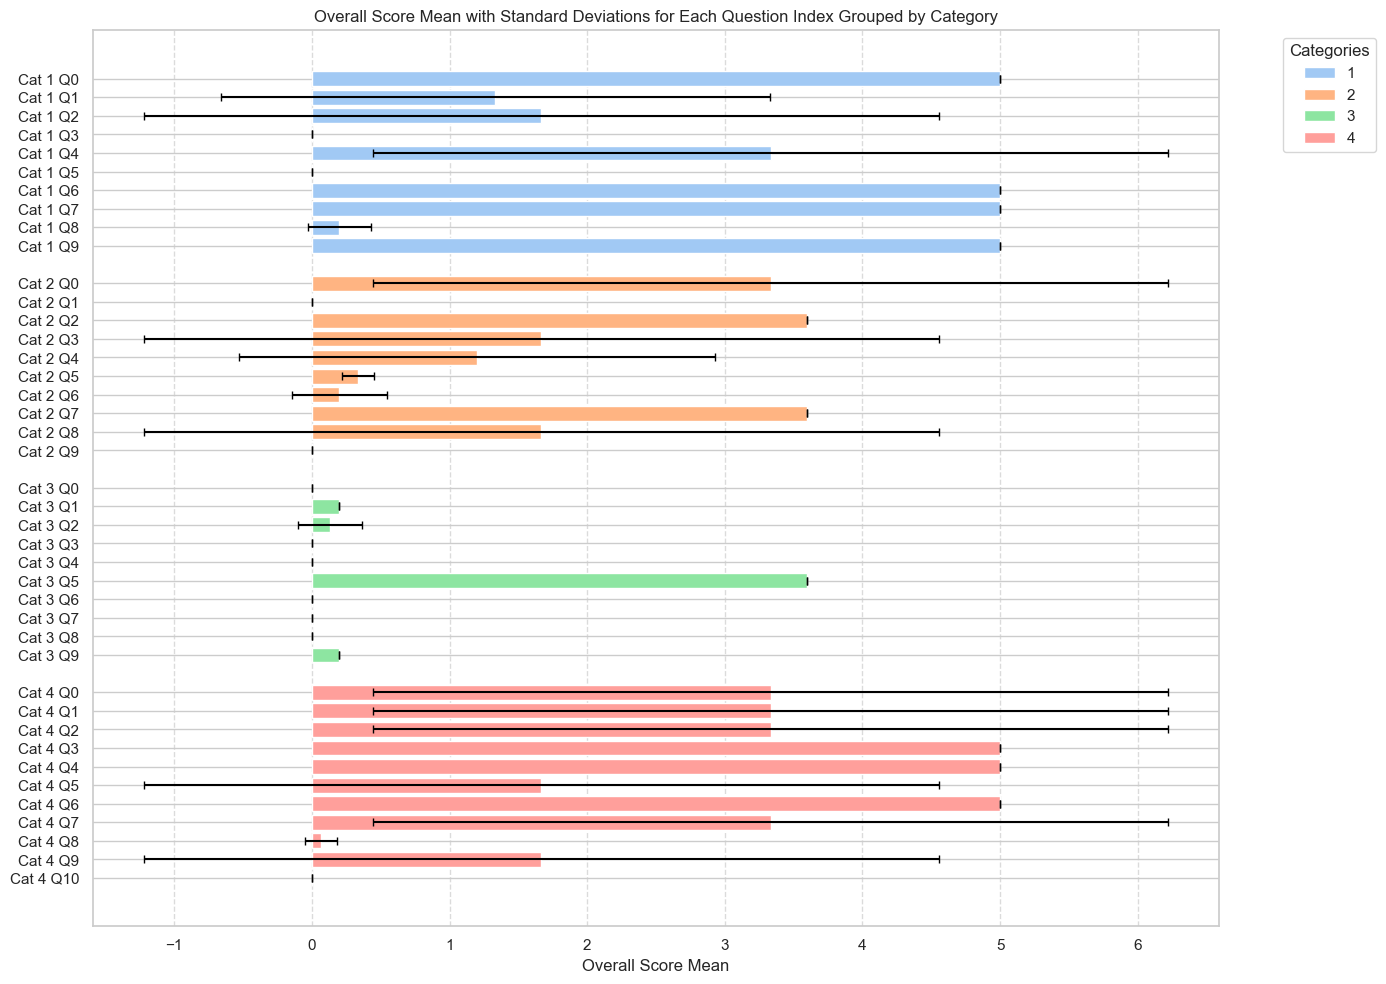

In [36]:
# Set the seaborn style
sns.set(style='whitegrid')

df = pd.read_csv('../deploy_medical_llm_evaluation/gold_standard_rephrasing/rephrased-evaluation_results_merged.csv')
# Sort categories for consistent plotting
df = df.sort_values(['category_id', 'question_index'])

# Prepare data for plotting
plot_data = df.copy()

# Convert 'question_index' to integer for sorting
plot_data['question_index'] = plot_data['question_index'].astype(int)

# Create a new column combining category and question index for labeling
plot_data['Category_Question'] = 'Cat ' + plot_data['category_id'].astype(str) + ' Q' + plot_data['question_index'].astype(str)

# Reset index to ensure correct order
plot_data = plot_data.reset_index(drop=True)

# Map category IDs to integers for coloring
category_list = plot_data['category_id'].unique()
category_map = {category: idx for idx, category in enumerate(category_list)}
plot_data['category_idx'] = plot_data['category_id'].map(category_map)

# Add a new y position to introduce gaps between categories
plot_data['y_pos'] = 0

current_y = 0
gap_size = 1  # Adjust gap size as needed

for category in category_list:
    category_indices = plot_data[plot_data['category_id'] == category].index
    num_questions = len(category_indices)
    plot_data.loc[category_indices, 'y_pos'] = range(current_y, current_y + num_questions)
    current_y += num_questions + gap_size  # Add gap after each category

# Set up the plot
plt.figure(figsize=(14, 10))

# Create a color palette with as many colors as categories
palette = sns.color_palette('pastel', n_colors=len(category_list))

# Create the bar plot using matplotlib directly
ax = plt.gca()

# Plot bars manually to control positions and colors
for idx, row in plot_data.iterrows():
    ax.barh(
        y=row['y_pos'],
        width=row['GPT_overall_score_mean'],  # Use 'overall_score_mean' instead of 'mean_of_means'
        xerr=row['GPT_overall_score_std'],    # Use 'overall_score_std' instead of 'mean_of_stds'
        height=0.8,
        color=palette[row['category_idx']],
        capsize=3,
        error_kw={'ecolor': 'black'},
        label=row['category_id'] if idx == plot_data[plot_data['category_id'] == row['category_id']].index[0] else ""
    )

# Remove duplicate labels for legend
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), title='Categories', bbox_to_anchor=(1.05, 1), loc='upper left')

# Customize the plot
plt.title('Overall Score Mean with Standard Deviations for Each Question Index Grouped by Category')
plt.xlabel('Overall Score Mean')
# Remove y-axis label as labels are self-explanatory
plt.ylabel('')

# Set y-ticks and labels
plt.yticks(plot_data['y_pos'], plot_data['Category_Question'])

# Invert y-axis so that the first question appears on top
plt.gca().invert_yaxis()

# Show grid lines for clarity
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Adjust layout to avoid overlap
plt.tight_layout()

# Display the plot
plt.show()

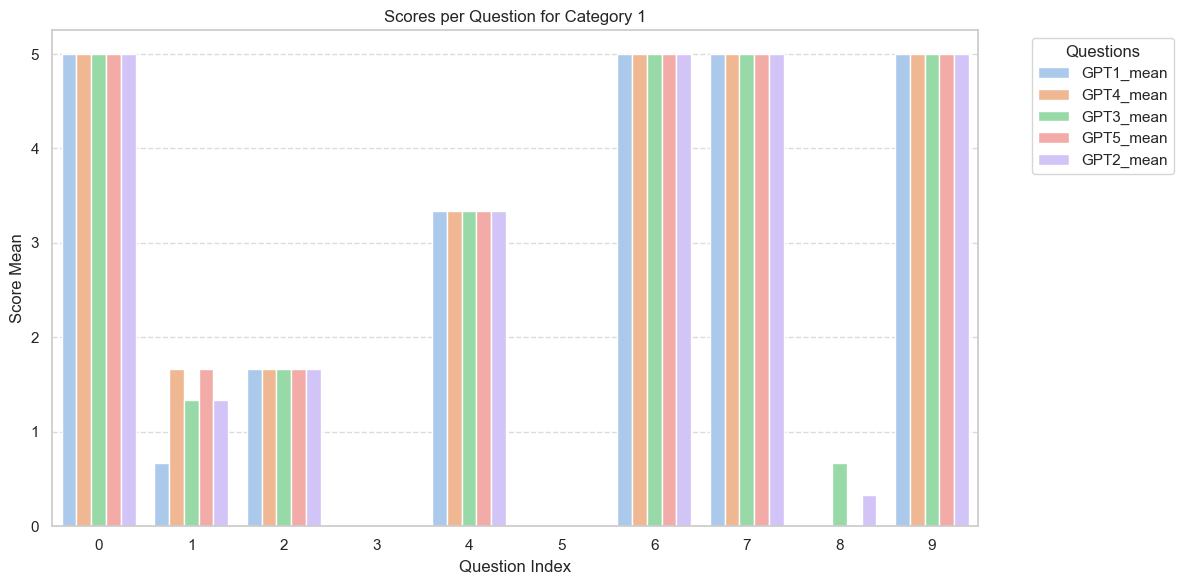

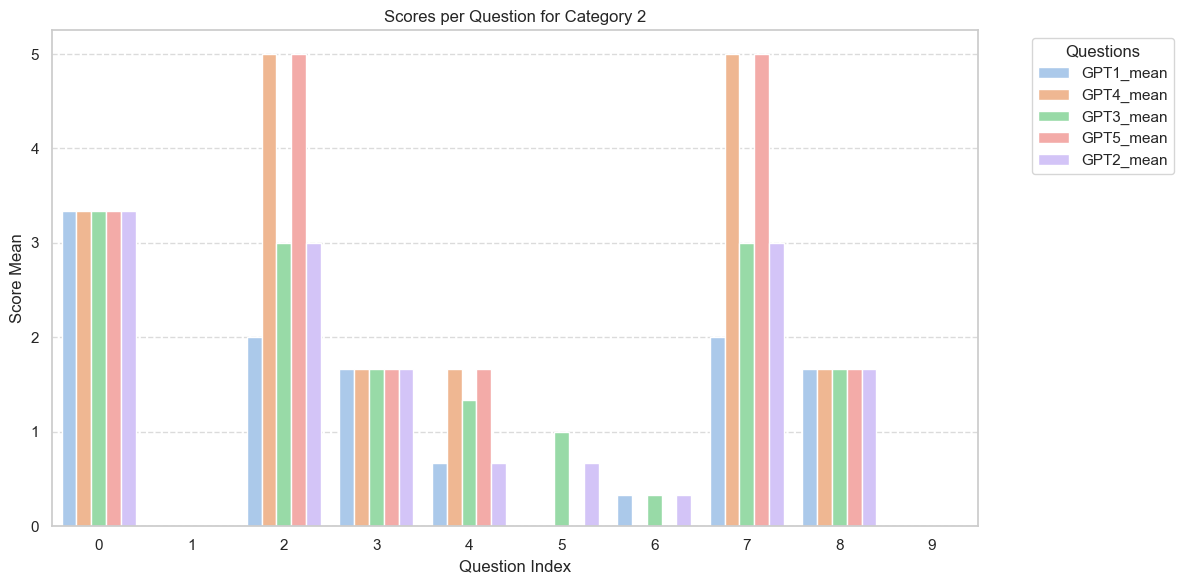

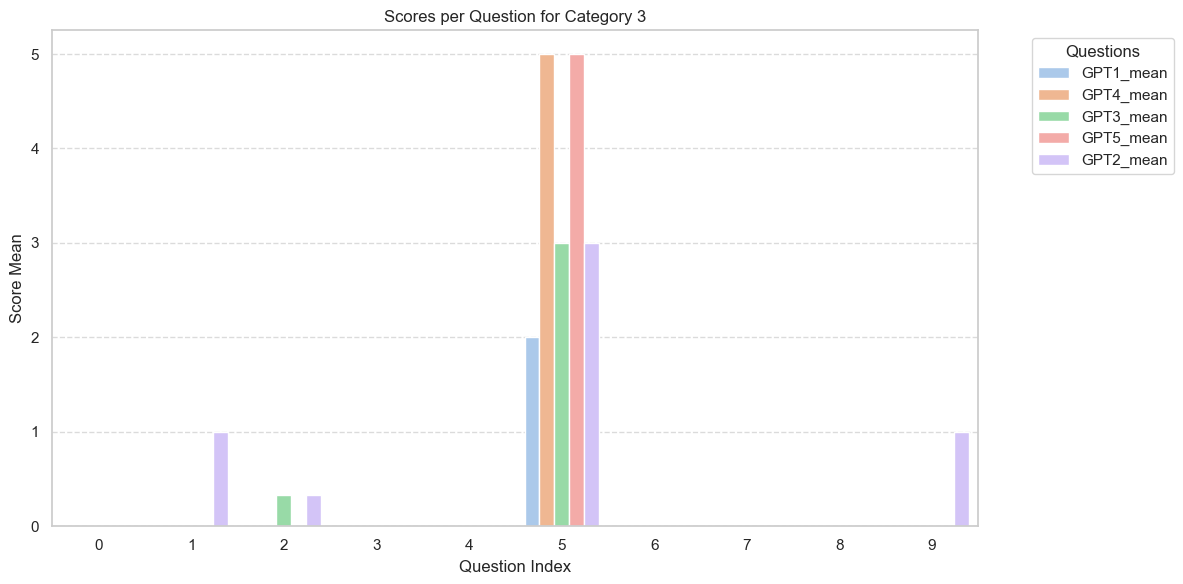

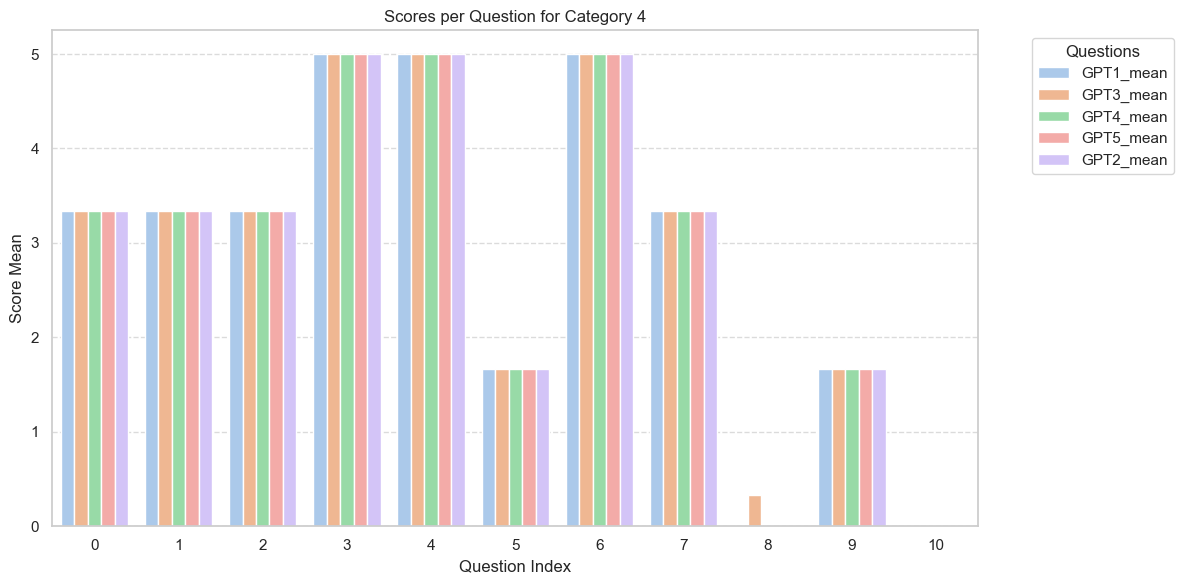

In [37]:
# Filter out the 'overall' rows
question_df = df[df['question_index'] != 'overall']

# Convert 'question_index' to integer for sorting
question_df['question_index'] = question_df['question_index'].astype(int)

# Prepare data for plotting
score_columns = ['GPT1_mean', 'GPT2_mean', 'GPT3_mean', 'GPT4_mean', 'GPT5_mean']
questions = ['GPT1', 'GPT2', 'GPT3', 'GPT4', 'GPT5']

# Loop over each category
for category in question_df['category_id'].unique():
    # Filter data for the category
    cat_df = question_df[question_df['category_id'] == category]
    
    # Melt the DataFrame to long format
    melted_df = pd.melt(
        cat_df,
        id_vars=['question_index'],
        value_vars=score_columns,
        var_name='Question',
        value_name='Score Mean'
    )
    
    # Sort data
    melted_df = melted_df.sort_values('question_index')
    
    # Set up the plot
    plt.figure(figsize=(12, 6))
    
    # Create grouped bar plot
    sns.barplot(
        data=melted_df,
        x='question_index',
        y='Score Mean',
        hue='Question',
        palette='pastel'
    )
    
    # Add labels and title
    plt.xlabel('Question Index')
    plt.ylabel('Score Mean')
    plt.title(f'Scores per Question for Category {category}')
    
    # Adjust legend
    plt.legend(title='Questions', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Show grid lines for clarity
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Display the plot
    plt.tight_layout()
    plt.show()